# Employee Retention

## Goal

Employee turnover is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

t is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).

In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.

## Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers

## Hints

What are the main factors that drive employee churn? Do they make sense? Explain your findings.

What might you be able to do for the company to address employee Churn, what would be follow-up actions?

If you could add to this data set just one variable that could help explain employee churn, what would that be?

Your output should be in the form a a jupyter notebook and pdf output of a jupyter notebook in which you specify your results and how you got them.

## Data

The table is: "employee_retention" - comprehensive information about employees

Columns:
- employee_id : id of the employee. Unique by employee per company 
- company_id : company id. 
- dept : employee dept 
- seniority : number of yrs of work experience when hired 
- salary: avg yearly salary of the employee during her tenure within the company 
- join_date: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13 
- quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)


## Additional variable 

- Internal mobility: did the patient get a promotion?
- satisfaction: reported at annual / bi-annual evaluation

# Loading and preparing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

In [42]:
# Load the data and first look at it
df = pd.read_csv('employee_retention_data.csv')
display(df.head(10))
display(df.describe())

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
6,88600.0,4,customer_service,21,107000.0,2013-10-21,NaN
7,716309.0,2,customer_service,4,30000.0,2014-03-05,NaN
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23
9,504159.0,1,sales,7,104000.0,2012-06-12,NaN


,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [43]:
# Generating a new binary outcome variable, 
df['quit'] = 0
df.loc[~df['quit_date'].isnull(), 'quit'] = 1
# Filling the NaNs in quit_date with the end time of the study
df['quit_date'].fillna('2015-12-13', inplace=True)
# Adding a new retention variable
df['retention'] = (pd.to_datetime(df['quit_date']) - pd.to_datetime(df['join_date'])).dt.days
df['start_month'] = pd.to_datetime(df['join_date']).dt.month
# Dropping seniority of 99 years
df = df[df.seniority < 98]
df.head(10)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,retention,start_month
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585,3
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340,4
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-13,0,426,10
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389,5
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040,10
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30,1,578,1
6,88600.0,4,customer_service,21,107000.0,2013-10-21,2015-12-13,0,783,10
7,716309.0,2,customer_service,4,30000.0,2014-03-05,2015-12-13,0,648,3
8,172999.0,9,engineer,7,160000.0,2012-12-10,2015-10-23,1,1047,12
9,504159.0,1,sales,7,104000.0,2012-06-12,2015-12-13,0,1279,6


# First look at the data

There are no very strong notable association in the data. 
Seniority seems to be correlated with salary. 
Interestingly, there could a trend between the month of hire and the duration of employment.
Looking at the retention more carefully, I can see that there are prefered time when people quit: around year 1, then around year 2, ... This seems to be true across companies

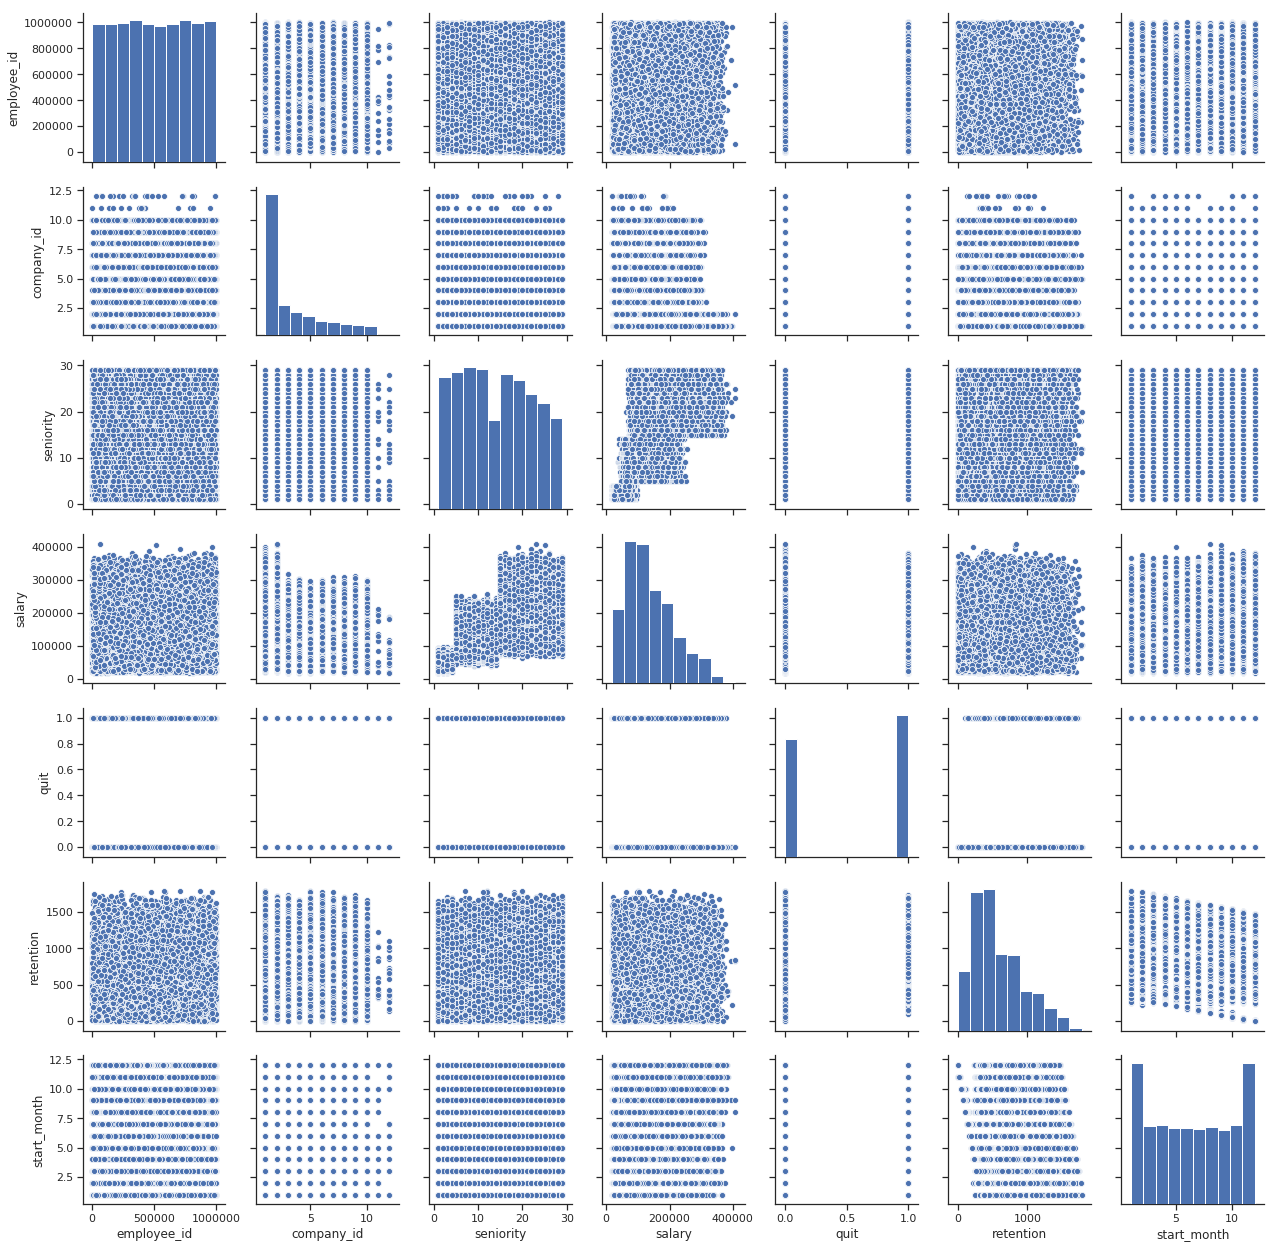

In [44]:
# Visualization of the relationship between variables (scatter)
g = sns.pairplot(df)

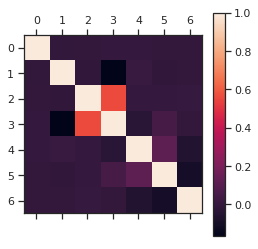

In [48]:
# Visualization of the relationship between variables (correlation)
plt.matshow(df.corr());
plt.colorbar();

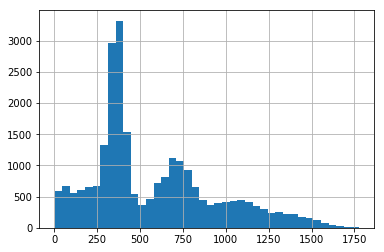

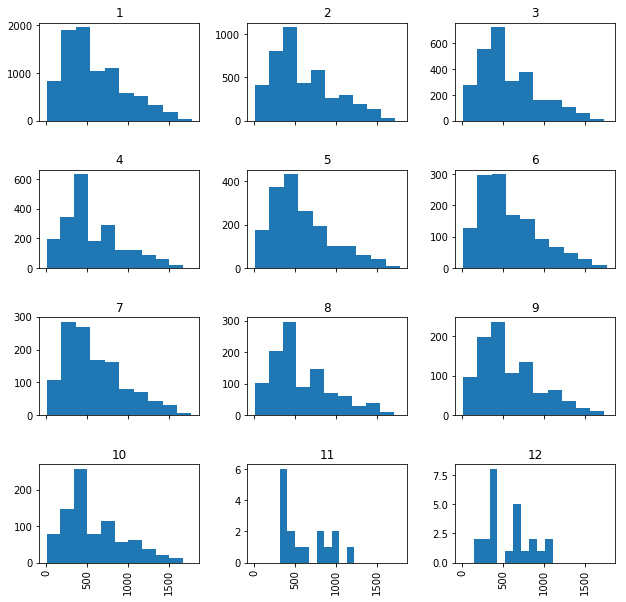

In [6]:
# Looking at retention overall and by company
df['retention'].hist(bins=40);
df.hist(column='retention', by='company_id', figsize=(10,10), sharex=True);

# Looking at the company level

There is a wide range in terms of nb of employees between those company (16 to 8486 employees).
There doesn't seems to be any strong association between variables at the company level, except possibly between seniority and retention.

In [56]:
# Building some company level averages
df_company = pd.DataFrame({
    'retention': df.groupby('company_id')['retention'].mean(),
    'employee_nb': df.groupby('company_id')['employee_id'].count(),
    'seniority': df.groupby('company_id')['seniority'].mean(),
    'salary': df.groupby('company_id')['salary'].mean(),
})
df_company

,retention,employee_nb,seniority,salary
company_id,,,,
1,578.080613,8485,14.131998,152163.700648
2,584.572241,4222,14.297489,155728.090952
3,564.431430,2749,14.054565,122118.588578
4,563.377789,2062,14.023763,122721.144520
5,570.156125,1755,14.474644,123348.717949
6,567.033308,1291,14.089853,119925.639040
7,582.803922,1224,13.906046,121582.516340
8,563.765043,1047,13.867240,122284.622732
9,569.098855,961,13.778356,123905.306972


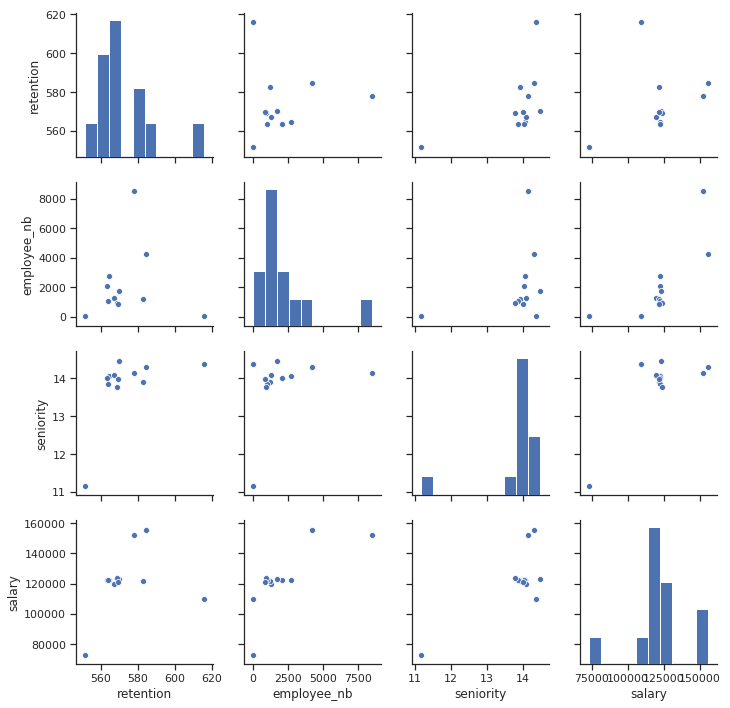

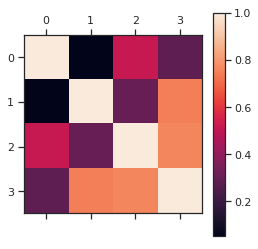

In [57]:
# Visualization of the relationship between variables
g = sns.pairplot(df_company)
plt.matshow(df_company.corr());
plt.colorbar();

# Looking at the dept level

Some departments have higher turnaround (e.g., sales).

,count,retention,seniority,salary
dept,,,,
customer_service,9180,561.547821,14.171133,82245.424837
data_science,3190,606.593417,14.189028,206885.893417
design,1380,573.282609,14.197826,137460.869565
engineer,4612,602.433218,14.153946,205531.439722
marketing,3166,559.408402,13.966835,135582.438408
sales,3172,553.014502,13.979823,135912.358134


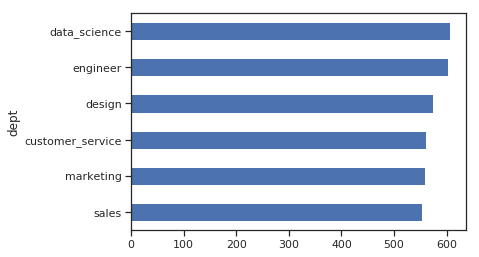

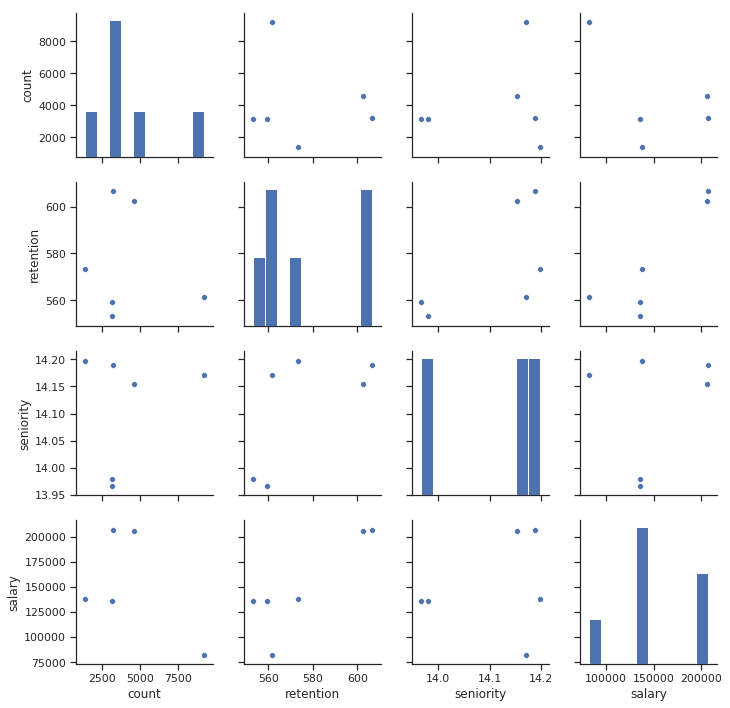

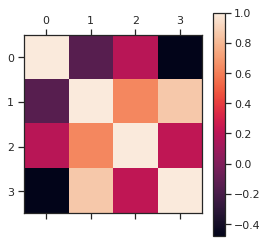

In [94]:
# Building some dpt level averages
df_dept = pd.DataFrame({
    'count': df.groupby('dept')['retention'].count(),
    'retention': df.groupby('dept')['retention'].mean(),
    'seniority': df.groupby('dept')['seniority'].mean(),
    'salary': df.groupby('dept')['salary'].mean(),
})
df_dept['retention'].sort_values().plot.barh()
g = sns.pairplot(df_dept)
plt.matshow(df_dept.corr());
plt.colorbar();
df_dept

# Building a regression model to predict employees leaving the company

Both the linear regression and the random forest achieve low accuracy on the training data, which limits the validity of the interpretation. However, a few interesting points:
- for both methods, it seems that salary, seniority and start month play an important role
- the lin reg that employees in company 11 and 12 quit earlier and that sales leave earlier

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

df_reg = df[df.quit == 1]
y = df_reg['retention'].values
X = pd.get_dummies(df_reg[['company_id', 'dept', 'seniority', 'salary', 'start_month']], 
                   columns=['company_id', 'dept'], prefix='d')
cols = X.columns
X = X.values
X = MinMaxScaler().fit_transform(X)

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

from sklearn.model_selection import cross_val_score,cross_validate
scores = cross_validate(reg, X, y, cv=5)
print(scores)

pd.DataFrame({
    'name': cols,
    'importance': reg.coef_
}).sort_values(by='importance')


0.015220687997487992
{'fit_time': array([0.00546598, 0.00689745, 0.00783563, 0.00698972, 0.00570941]), 'score_time': array([0.00060129, 0.00070143, 0.00102711, 0.0006249 , 0.00050116]), 'test_score': array([0.00870628, 0.01427364, 0.01240962, 0.01114118, 0.01553327]), 'train_score': array([0.01636792, 0.0150354 , 0.01540208, 0.0158483 , 0.01487358])}


,name,importance
14,d_12,-106.670319
0,seniority,-99.699541
2,start_month,-60.779078
13,d_11,-46.055175
20,d_sales,-23.817364
19,d_marketing,-4.087631
17,d_design,-3.700959
18,d_engineer,-3.303515
16,d_data_science,-2.331220
10,d_8,2.393509


In [87]:
reg = RandomForestRegressor().fit(X, y)
print(reg.score(X, y))

from sklearn.model_selection import cross_val_score,cross_validate
scores = cross_validate(reg, X, y, cv=5)
print(scores)

pd.DataFrame({
    'name': cols,
    'importance': reg.feature_importances_
}).sort_values(by='importance')

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7737298743492773
{'fit_time': array([0.29985523, 0.2752378 , 0.30398917, 0.29813528, 0.28671575]), 'score_time': array([0.007128  , 0.00690436, 0.00764799, 0.0073421 , 0.00708771]), 'test_score': array([-0.18807483, -0.17736043, -0.20235724, -0.17942316, -0.2063577 ]), 'train_score': array([0.77565317, 0.77643109, 0.78352196, 0.77629087, 0.7740333 ])}


,name,importance
13,d_11,0.000299
14,d_12,0.000322
15,d_customer_service,0.005783
17,d_design,0.009649
12,d_10,0.012408
10,d_8,0.013267
9,d_7,0.013598
16,d_data_science,0.013781
11,d_9,0.013877
18,d_engineer,0.013966


# Training a classifier to find employees that quit

The RF gets a better accuracy (0.81), and uses mostly retention, salary, start month and seniority to make a decision.
The logistic regression has consistent results except for seniority that has a low coefficient.
There might be an imbalance in the distribution of dept, which could affect how those are influencing the classifier, but the current results indicate that employee get unhappy faster in marketing, customer service and sales compared to the other dept.

,seniority,salary,quit,retention,start_month,d_customer_service,d_data_science,d_design,d_engineer,d_marketing,...,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12
0,28,89000.0,1,585,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,20,183000.0,1,340,4,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,14,101000.0,0,426,10,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,20,115000.0,1,389,5,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,23,276000.0,1,1040,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,165000.0,1,578,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,21,107000.0,0,783,10,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,4,30000.0,0,648,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7,160000.0,1,1047,12,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,7,104000.0,0,1279,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


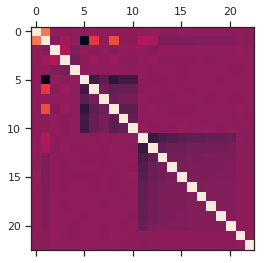

In [89]:
# Selecting the features and creating the dummy variables for the categorical ones
df2 = pd.get_dummies(df, columns=['dept', 'company_id'], prefix='d')
df2 = df2.drop(['employee_id', 'join_date', 'quit_date'], axis=1)
plt.matshow(df2.corr())
df2.head(10)

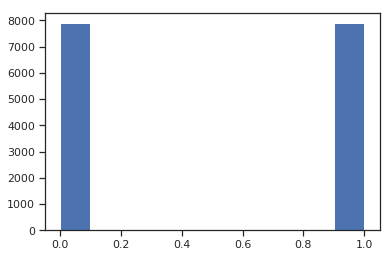

In [98]:
# Creating the train/test sets and balancing the classes
from sklearn.model_selection import train_test_split

Xb = df2.drop('quit', axis=1).values
Xb = MinMaxScaler().fit_transform(Xb)
col_names = df2.drop('quit', axis=1).columns
yb = df2['quit'].values
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)#, stratify=yb)

sel = y_train == 1
X0 = X_train[sel]
y0 = y_train[sel]
sub = np.random.choice(range(len(y0)), size=sum(~sel), replace=False)
X_train = np.concatenate([X_train[~sel,:], X0[sub,:]])
y_train = np.concatenate([y_train[~sel], y0[sub]])

plt.hist(y_train);

In [96]:
# running a random classifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print(dummy.score(X_test, y_test))

0.4456140350877193


0.5472334682860999


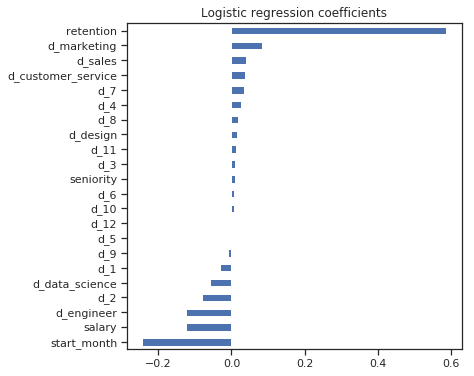

In [99]:
# Running a logistic regression classifier
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, max_iter=300, solver='liblinear')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

df3 = pd.DataFrame({'importance': clf.coef_[0]}, index=col_names)
df3.sort_values(by='importance').plot.barh(legend=False, figsize=(6,6), title='Logistic regression coefficients');

0.8082321187584346


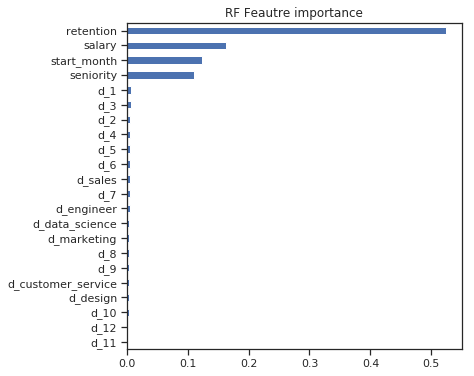

In [100]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

df3 = pd.DataFrame({'importance': clf.feature_importances_}, index=col_names)
df3.sort_values(by='importance').plot.barh(legend=False, figsize=(6,6), title='RF Feautre importance');

# Overall conclusion

Based on my investigation of the regression and the classification, here are some possible conclusions:
- a higher salary seems to keep employees happy
- senior employees might leave the company earlier
- the month of hire seems to have an influence 
- retention is predictive of who is quitting, meaning that the longer employees stay the more likely to leave, so it is wise to plan for it
- client facing dept seem to have more difficulties to keep employees happy.